In [2]:
import os
import re
import string

import pandas as pd
import numpy as np

from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

os.chdir("D:\HP2\Hate_Speech_Detection")


<>:30: SyntaxWarning: invalid escape sequence '\H'
<>:30: SyntaxWarning: invalid escape sequence '\H'
C:\Users\Bibek\AppData\Local\Temp\ipykernel_20336\3740151369.py:30: SyntaxWarning: invalid escape sequence '\H'
  os.chdir("D:\HP2\Hate_Speech_Detection")


,count
label,
0,29720
1,2247


0s : 1s  ::   13.23 : 1


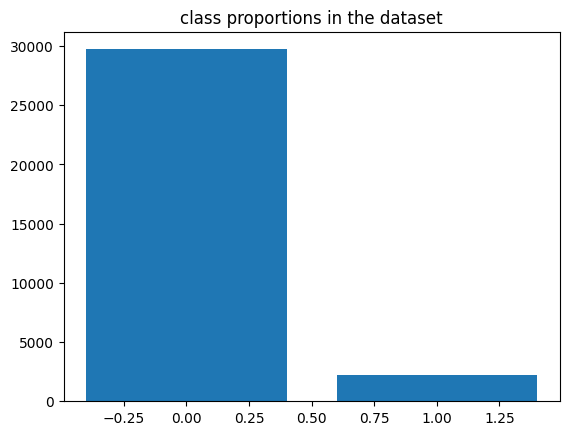

In [3]:
main_data=pd.read_csv("train.csv")
data=main_data.copy()
data.drop(columns=['id'],axis=1,inplace=True)
data


#Check class distribution in dependent variable
display(data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(data['label'].value_counts()[0]/data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],data['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()


,count
label,
0,29720
1,2247


0s : 1s  ::   13.23 : 1


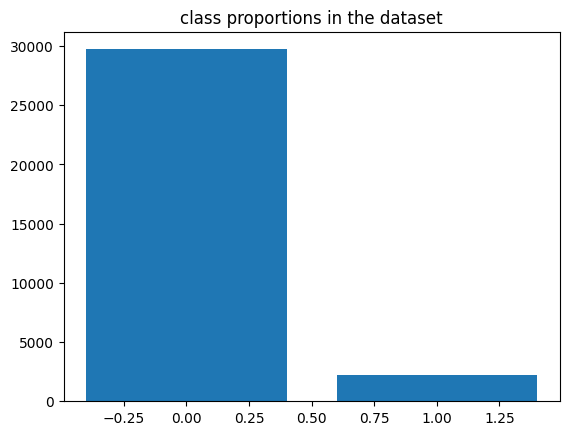

In [4]:
#Check class distribution in dependent variable 
display(data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(data['label'].value_counts()[0]/data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],data['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

#### we see that we have an unbalanced data mojority class to minority class ratio of 13 : 1

,count
label,
0,29720
1,6741


0s : 1s  ::   4.41 : 1


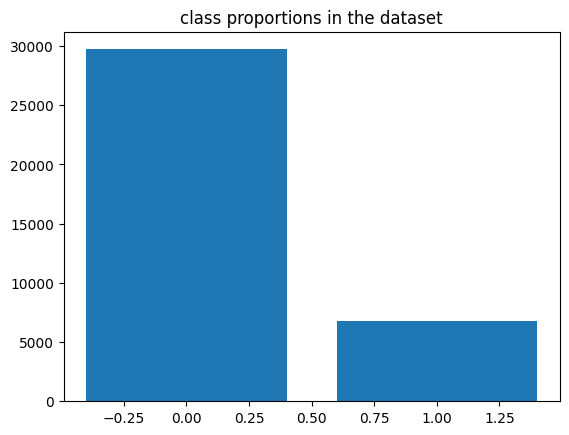

In [5]:
#Balancing the dataset using Oversampling
data1=data[data['label']==1]
data0=data[data['label']==0]
data=pd.concat([data,data1,data1], axis=0)
data
#Check class distribution in dependent variable again
display(data['label'].value_counts().to_frame())
print("0s : 1s  ::  ",(data['label'].value_counts()[0]/data['label'].value_counts()[1]).round(2),": 1")
plt.bar([0,1],data['label'].value_counts())
plt.title("class proportions in the dataset")
plt.show()

In [6]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)


def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))])

    return text2.lower()

In [7]:
#preprocess train dataset
data['tweet'] = data['tweet'].apply(remove_emoji)
data['tweet'] = data['tweet'].apply(clean_text)
data['Num_words_text'] = data['tweet'].apply(lambda x:len(str(x).split()))

train_data,test_data= train_test_split(data, test_size=0.2)
train_data.reset_index(drop=True,inplace=True)
test_data.reset_index(drop=True,inplace=True)

In [8]:
# #classes proportion in dependent variable in train and test dataset
print('===========Train Data =========')
print(train_data['label'].value_counts())
print(len(train_data))
print('==============================')

print('===========Test Data =========')
print(test_data['label'].value_counts())
print(len(test_data))
print('==============================')

===========Train Data =========
label
0    23794
1     5374
Name: count, dtype: int64
29168
===========Test Data =========
label
0    5926
1    1367
Name: count, dtype: int64
7293


In [9]:
#train and validation dataset splitting
X_train, X_valid, y_train, y_valid = train_test_split(train_data['tweet'].tolist(),\
                                                      train_data['label'].tolist(),\
                                                      test_size=0.2,\
                                                      stratify = train_data['label'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:23334
Class distributionCounter({0: 19035, 1: 4299})
Valid data len:5834
Class distributionCounter({0: 4759, 1: 1075})


In [10]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)

In [11]:
# Assuming you have already imported necessary libraries and initialized tokenizer

# Convert sentences to sequences of numbers
x_train_sequences = tokenizer.texts_to_sequences(X_train)
x_valid_sequences = tokenizer.texts_to_sequences(X_valid)
x_test_sequences = tokenizer.texts_to_sequences(test_data['tweet'].tolist())

# Padding sequences
maxlen = 50  # Assuming you want sequences of maximum length 50
x_train_padded = pad_sequences(x_train_sequences, padding='post', maxlen=maxlen)
x_valid_padded = pad_sequences(x_valid_sequences, padding='post', maxlen=maxlen)
x_test_padded = pad_sequences(x_test_sequences, padding='post', maxlen=maxlen)

# Convert labels to NumPy arrays
train_labels = np.asarray(y_train)
valid_labels = np.asarray(y_valid)
test_labels = np.asarray(test_data['label'].tolist())

# Display information
print('Train data len:' + str(len(x_train_padded)))
print('Class distribution' + str(Counter(train_labels)))

print('Validation data len:' + str(len(x_valid_padded)))
print('Class distribution' + str(Counter(valid_labels)))

print('Test data len:' + str(len(x_test_padded)))
print('Class distribution' + str(Counter(test_labels)))

# TensorFlow dataset preparation
train_ds = tf.data.Dataset.from_tensor_slices((x_train_padded, train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid_padded, valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test_padded, test_labels))

Train data len:23334
Class distributionCounter({0: 19035, 1: 4299})
Validation data len:5834
Class distributionCounter({0: 4759, 1: 1075})
Test data len:7293
Class distributionCounter({0: 5926, 1: 1367})


In [12]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break

======Train dataset ====
tf.Tensor(
[12471  2486    60   904  1174   250 12472     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int32)
======Validation dataset ====
tf.Tensor(
[ 283 4827    1    1   72  374    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(50,), dtype=int32) tf.Tensor(0, shape=(), dtype=int32)
======Test dataset ====
tf.Tensor(
[    2     2     2     2     2   137  7594    83 33130     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0 

In [13]:
# Model preparation
max_features = 50000
embedding_dim = 16
sequence_length = maxlen

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features + 1, embedding_dim, embeddings_regularizer=regularizers.l2(0.005)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(embedding_dim, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.005), bias_regularizer=regularizers.l2(0.005)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-3), metrics=[tf.keras.metrics.BinaryAccuracy()])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
epochs = 10
# Fit the model using the train and test datasets.
history = model.fit(train_ds.shuffle(5000).batch(1024),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1024),
                    verbose=1)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - binary_accuracy: 0.7248 - loss: 3.8137 - val_binary_accuracy: 0.8157 - val_loss: 1.5370
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - binary_accuracy: 0.8116 - loss: 1.3398 - val_binary_accuracy: 0.8157 - val_loss: 0.7882
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - binary_accuracy: 0.8138 - loss: 0.7968 - val_binary_accuracy: 0.8157 - val_loss: 0.6574
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - binary_accuracy: 0.8135 - loss: 0.6824 - val_binary_accuracy: 0.8157 - val_loss: 0.6082
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - binary_accuracy: 0.8144 - loss: 0.6441 - val_binary_accuracy: 0.8157 - val_loss: 0.5878
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - binary_accuracy: 0.8134 - loss: 0.6221 - val_binary_accuracy: 0.8157 - val_loss: 0.5661
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - binary_accuracy: 0.8135 - loss: 0.6001 - val_binary_accuracy: 0.8157 - val_loss: 0.5464
Epoch 8/10
23

In [15]:
#make predictions on validation dataset
valid_predict = model.predict(valid_ds.batch(1024))[:len(valid_labels)]
print(valid_predict[:10])

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
[[0.00974637]
 [0.02864534]
 [0.05138825]
 [0.00283231]
 [0.95463425]
 [0.01652508]
 [0.00349628]
 [0.08296825]
 [0.13017306]
 [0.35673943]]


In [16]:
# Tokenize the test data
x_test_sequences = tokenizer.texts_to_sequences(test_data['tweet'].tolist())

# Pad sequences to ensure uniform length
x_test_padded = pad_sequences(x_test_sequences, padding='post', maxlen=maxlen)

# Convert to NumPy array
x_test = np.array(x_test_padded)

# Generate predictions for all samples
predictions = model.predict(x_test)

228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [17]:
model.save('model12.h5')

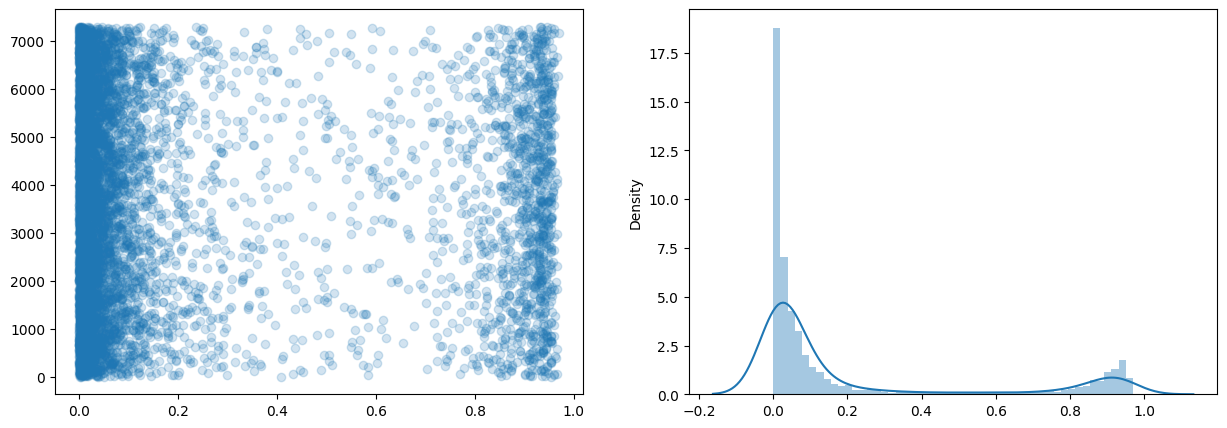

In [18]:
#plot predictions
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(predictions,range(0,len(predictions)),alpha=0.2)
ax2=sns.distplot(predictions)

#### A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


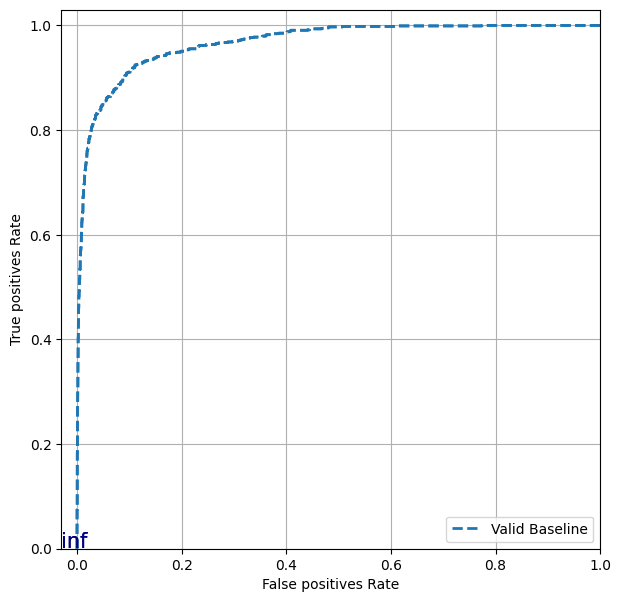

In [19]:
#decide the cutoff for classifying the predicted probabilities as 1 or 0
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives Rate')
    plt.ylabel('True positives Rate')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.grid(True)
    thresholdsLength = len(thresholds)
    thresholds_every = 1000
    colorMap = plt.get_cmap('jet', thresholdsLength)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
        plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength))

    ax = plt.gca()
    ax.set_aspect('equal')

mpl.rcParams['figure.figsize'] = (7,7)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc("Valid Baseline", valid_labels, valid_predict, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

# Change the line to match the shape of the valid_labels
valid_predict = model.predict(valid_ds.batch(1024))[:len(valid_labels)]

# Use the valid_labels for ROC curve calculation
plot_roc("Valid Baseline", valid_labels, valid_predict, color=colors[0], linestyle='--')

In [20]:
cutoff=0.86
test_data['pred_sentiment']= predictions
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment >= cutoff),1,test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment < cutoff),0,test_data.pred_sentiment)

labels = [0, 1]
print(classification_report(test_data['label'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5926
           1       0.94      0.61      0.74      1367

    accuracy                           0.92      7293
   macro avg       0.93      0.80      0.85      7293
weighted avg       0.92      0.92      0.91      7293



## TESTING MODEL ON THE TEST DATASET PROVIDED

In [21]:
final_test=pd.read_csv("test.csv")

ftest=final_test.copy()
ftest.drop(columns=['id'],axis=1,inplace=True)

ftest['tweet'] = ftest['tweet'].apply(remove_emoji)
ftest['tweet'] = ftest['tweet'].apply(clean_text)

f_test_sequences = tokenizer.texts_to_sequences(ftest['tweet'].tolist())
f_test_padded = pad_sequences(f_test_sequences, padding='post', maxlen=maxlen)
f_test = np.array(f_test_padded)
display((x_test))
display((f_test))

array([[   2,    2,    2, ...,    0,    0,    0],
       [  10,    1,    1, ...,    0,    0,    0],
       [   1,  656,   18, ...,    0,    0,    0],
       ...,
       [  19,  620, 1203, ...,    0,    0,    0],
       [   2,   39,  258, ...,    0,    0,    0],
       [  11,  458, 1724, ...,    0,    0,    0]])

array([[10997,     1,  5590, ...,     0,     0,     0],
       [    2,    65,  6865, ...,     0,     0,     0],
       [  431,   632,   686, ...,     0,     0,     0],
       ...,
       [  374,   700,   113, ...,     0,     0,     0],
       [  279,   841, 11664, ...,     0,     0,     0],
       [   11,   414,     0, ...,     0,     0,     0]])

In [22]:
#predict on actual test data
predictions = model.predict(f_test)

538/538 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


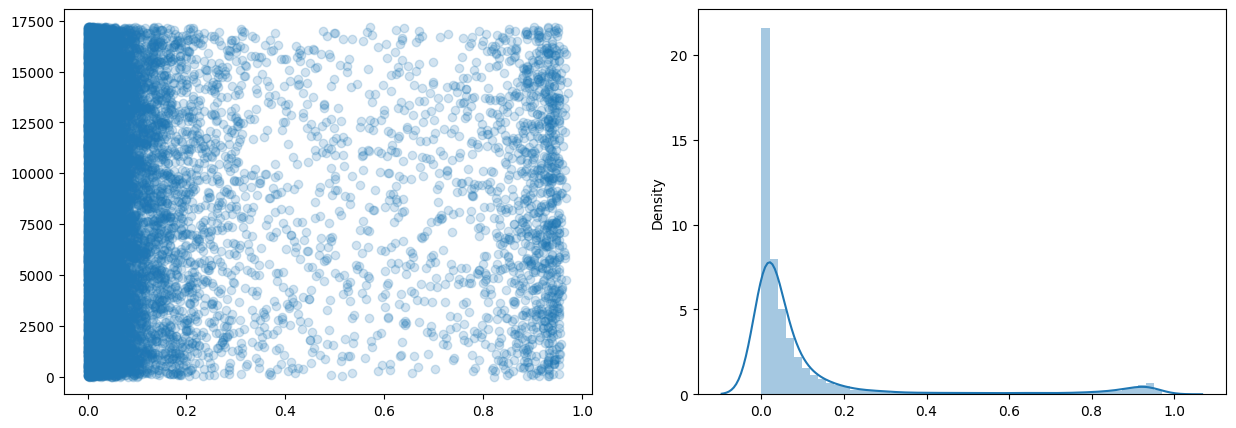

In [23]:

#plot predictions
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
ax1.scatter(predictions,ftest.index,alpha=0.2)
ax2=sns.distplot(predictions)

In [24]:
#mapping prediction to 1 or 0
ftest['pred_sentiment']= predictions
ftest['pred_sentiment'] = np.where((ftest.pred_sentiment >= cutoff),1,ftest.pred_sentiment)
ftest['pred_sentiment'] = np.where((ftest.pred_sentiment < cutoff),0,ftest.pred_sentiment)

#processed tweets categorized as hate speech
pd.set_option('display.max_colwidth', None)
ftest[ftest['pred_sentiment']==1]

,tweet,pred_sentiment
19,thought factory neutrality right wing fascism politics media brexit trump leadership,1.0
26,chick gets fucked hottest naked lady,1.0
33,suppo taiji fisherman bullying racism tweet4taiji thecove seashepherd,1.0
42,user user trumps invested billions into saudi empowers people funding isis trumpsahypocrite,1.0
110,user ivanka bracelet feel good profiting from xenophobia misogyny hatred grabyourwallet,1.0
...,...,...
17125,careful criticizing obama decision israel sanctions against russiahacking liberals will consider this,1.0
17128,user governmentâs antisemitism definition conflates with valid criticism israel opendemocracy,1.0
17176,user user most racist ever,1.0
17188,black professor demonizes proposes nazi style confiscation white assets like 1930s germany breaking,1.0


In [25]:
#actual tweets categorized as hate speech
final_test.iloc[ftest[ftest['pred_sentiment']==1].index]

,id,tweet
19,31982,thought factory: bbc neutrality on right wing fascism #politics #media #blm #brexit #trump #leadership &gt;3
26,31989,chick gets fucked hottest naked lady
33,31996,suppo the #taiji fisherman! no bullying! no racism! #tweet4taiji #thecove #seashepherd
42,32005,@user @user trumps invested billions into saudi. he empowers the people funding isis. #trumpsahypocrite
110,32073,hey @user - a $14000 ivanka bracelet? do you feel good profiting from #xenophobia? #misogyny? #hatred? ? #grabyourwallet
...,...,...
17125,49088,"be careful in criticizing #obama for his decision on #israel &amp; sanctions against #russiahacking , as #liberals will consider this"
17128,49091,@user the uk governmentâs new #anti-semitism definition conflates with valid criticism of #israel | opendemocracy
17176,49139,@user @user are the most racist pay ever!!!!!
17188,49151,"black professor demonizes, proposes nazi style confiscation of ""white"" assets; like 1930's germany #breaking"


In [29]:
# Preprocess the input text
test_data = "fuck off"
test_data = remove_emoji(test_data)
test_data = clean_text(test_data)

# Tokenize and pad the input text
test_data_seq = tokenizer.texts_to_sequences([test_data])
test_data_padded = pad_sequences(test_data_seq, padding='post', maxlen=maxlen)
cutoff=0.5
# Predict using the modelL
prediction = model.predict(test_data_padded)
print(prediction,cutoff)
# Map prediction to class
if prediction>=cutoff:
    print("The input text is classified as hate speech.")
else:
    print("The input text is not classified as hate speech.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.12113834]] 0.5
The input text is not classified as hate speech.


In [27]:
model.save('model1.h5')